###             Water Quality

### Veri Seti:
https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [1]:
import pandas as pd #dataframeler ve seriler uzerindeki islemler icin
import numpy as np #sayisal islemlerim icin
import joblib

seed = 42
np.random.seed(seed)


from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('WaterPotability.csv')
print(df)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [3]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [5]:
df.isna() #isna ile soru sordum null degerleri goruntuledim, true null

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


Veri setinde ph sütununda 491, sulfate'ta 781, trihalomethanes sütununda 162 eksik veri bulunmaktadır.

In [6]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Toplamda ise 1434 veri eksiktir.

In [7]:
df.isna().sum().sum()

1434

In [8]:
# Eksik veri bulunan sütunlar
columns_to_drop = ['ph', 'Sulfate']

# Belirtilen sütunlarda eksik veri bulunan satırları siliyoruz
df_dropped = df.dropna(subset=columns_to_drop, inplace=True)

print("Belirtilen sütunlarda eksik veri bulunan satırlar silindi:")
print(df_dropped)

Belirtilen sütunlarda eksik veri bulunan satırlar silindi:
None


In [9]:
df.isnull().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    105
Turbidity            0
Potability           0
dtype: int64

In [10]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [11]:
df.count()

ph                 2116
Hardness           2116
Solids             2116
Chloramines        2116
Sulfate            2116
Conductivity       2116
Organic_carbon     2116
Trihalomethanes    2011
Turbidity          2116
Potability         2116
dtype: int64

In [12]:
df.shape #satir sutun sayisini gosterir. shape[0] satiri shape 1 sutunu gosterir

(2116, 10)

In [13]:
df['Potability'].unique() #potabilitydeki unique(essiz) degerleri gosterdimb

array([0, 1], dtype=int64)


İçilebilir nitelikleri içilebilir satırlara göre doldurmanın daha mantıklı olacağından dolayı; Sınıf + Nitelik Bazlı Tamamlama Yapacağım.

In [14]:
df[df['Potability']==0]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3108,11.449739,186.652648,12355.344107,7.065576,321.831513,503.964110,16.282371,77.152173,5.166903,0
3109,6.283679,205.376624,19905.436548,7.078345,284.206021,471.904032,18.027160,64.362608,4.480771,0
3114,6.971577,185.906938,27959.987873,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0
3115,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,0


Tablolarımı sınıf değerlerine göre 2(sınıf sayısı) ayrı tabloya ayırdım. En son birleştireceğim.

In [15]:
df0=df[df['Potability']==0]

In [16]:
df1=df[df['Potability']==1]

In [17]:
df0.shape

(1269, 10)

In [18]:
df1.shape

(847, 10)

In [19]:
df0.isna().sum()

ph                  0
Hardness            0
Solids              0
Chloramines         0
Sulfate             0
Conductivity        0
Organic_carbon      0
Trihalomethanes    69
Turbidity           0
Potability          0
dtype: int64

In [20]:
df1.isna().sum()

ph                  0
Hardness            0
Solids              0
Chloramines         0
Sulfate             0
Conductivity        0
Organic_carbon      0
Trihalomethanes    36
Turbidity           0
Potability          0
dtype: int64

In [21]:
import statistics as st

In [22]:
df0.iloc[999] #1998 veri var ortanca degerine baktığımda (999.) aynı sonucu mu veriyor diye kontrol ettim.

ph                     7.381109
Hardness             188.314378
Solids             12320.512292
Chloramines            5.493514
Sulfate              343.239612
Conductivity         475.301884
Organic_carbon        17.826838
Trihalomethanes       38.337345
Turbidity              4.342738
Potability             0.000000
Name: 2529, dtype: float64

Trihalomethanes NULL değeri içeren niteliklerim. Bunları dolduracağım.

In [23]:
df0.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1200.000000,1269.000000,1269.0
mean,7.065590,196.089145,21677.496284,7.108516,333.941127,426.953566,14.380541,66.278712,3.959790,0.0
std,1.667245,30.521899,8489.849802,1.489355,36.369712,80.212432,3.350397,15.931953,0.792802,0.0
min,0.975578,98.452931,320.942611,2.456014,203.444521,210.319182,4.371899,14.343161,1.450000,0.0
25%,5.983731,177.674305,15371.999944,6.147210,310.930858,368.770894,12.118475,56.152070,3.439476,0.0
50%,6.994195,196.734927,20575.573160,7.108628,332.881582,424.257013,14.338840,66.206116,3.945460,0.0
75%,8.153210,214.337270,26843.470364,8.081496,356.384272,481.771934,16.719156,77.144621,4.513201,0.0
max,14.000000,300.292476,55334.702799,12.653362,460.107069,753.342620,27.006707,120.030077,6.494749,0.0


In [66]:
triha0=df0['Trihalomethanes'].mean()
triha0

66.49155126582386

In [25]:
df0.fillna(value= {'Trihalomethanes':triha0}, inplace=True) #fillna ile bos satirlarin hepsini dolduruyorum
df0 #inplace:kalici olmadisini sagliyo. tekrar atamak yerine kullaniyoruz

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3108,11.449739,186.652648,12355.344107,7.065576,321.831513,503.964110,16.282371,77.152173,5.166903,0
3109,6.283679,205.376624,19905.436548,7.078345,284.206021,471.904032,18.027160,64.362608,4.480771,0
3114,6.971577,185.906938,27959.987873,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0
3115,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,0


In [26]:
df0.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [27]:
df1.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,811.000000,847.000000,847.0
mean,7.111142,195.667130,22521.139329,7.151988,332.371701,424.519415,14.302758,66.581596,3.984994,1.0
std,1.457023,35.871991,8954.517902,1.728443,47.281757,81.510355,3.264260,16.297713,0.774796,0.0
min,0.227499,47.432000,1198.943699,1.390871,129.000000,201.619737,2.200000,8.577013,1.492207,1.0
25%,6.249537,174.200575,15906.442722,6.061352,301.879095,360.016698,12.124666,55.751069,3.433837,1.0
50%,7.044375,197.617494,21379.963927,7.172920,331.145621,420.830866,14.250875,66.612984,4.003547,1.0
75%,7.943529,218.249178,28013.659746,8.158151,364.991885,481.110159,16.575130,77.372587,4.523965,1.0
max,13.175402,317.338124,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [28]:
triha1=df1['Trihalomethanes'].mean()
triha1

66.5815956108153

In [29]:
df1.fillna(value={'Trihalomethanes':triha1}, inplace=True)
df1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [30]:
df1.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [31]:
dframe=pd.concat([df0,df1])
dframe

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [32]:
dframe.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [33]:
dframe.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000
mean,7.083824,195.920219,22015.192720,7.125917,333.312912,425.979215,14.349405,66.397584,3.969878,0.400284
std,1.586245,32.760861,8686.584143,1.589125,41.083397,80.724078,3.315629,15.673009,0.785557,0.490072
min,0.227499,47.432000,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089079,176.832962,15666.690297,6.121864,307.706750,365.842780,12.118659,56.945270,3.436360,0.000000
50%,7.027241,197.103467,21041.034771,7.138343,332.477743,423.156807,14.298910,66.206116,3.966109,0.000000
75%,8.064291,216.122276,27353.621747,8.105680,359.267357,481.545011,16.665328,76.551208,4.521985,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


NİTELİKLERİN ORTALAMASI

In [34]:
dframe[dframe.columns].mean()

ph                     7.083824
Hardness             195.920219
Solids             22015.192720
Chloramines            7.125917
Sulfate              333.312912
Conductivity         425.979215
Organic_carbon        14.349405
Trihalomethanes       66.397584
Turbidity              3.969878
Potability             0.400284
dtype: float64

NİTELİKLERİN MEDYANLARI

In [35]:
dframe[dframe.columns].median()

ph                     7.027241
Hardness             197.103467
Solids             21041.034771
Chloramines            7.138343
Sulfate              332.477743
Conductivity         423.156807
Organic_carbon        14.298910
Trihalomethanes       66.206116
Turbidity              3.966109
Potability             0.000000
dtype: float64

NİTELİKLERİN MODLARI

In [36]:
for column in dframe.columns:
    print(column," \t \t ", st.mode(dframe[column]))

ph  	 	  8.316765884214679
Hardness  	 	  214.3733940856225
Solids  	 	  22018.41744077529
Chloramines  	 	  8.05933237743854
Sulfate  	 	  356.88613564305666
Conductivity  	 	  363.2665161642437
Organic_carbon  	 	  18.436524495493305
Trihalomethanes  	 	  66.20611636051328
Turbidity  	 	  4.628770536837084
Potability  	 	  0


In [37]:
df0['ph_category'] = df0['ph'].apply(lambda x: 'Asidik' if x < 7 else ('Bazik' if x > 7 else 'Nötr'))

print(df0[['ph', 'ph_category']])

             ph ph_category
3      8.316766       Bazik
4      9.092223       Bazik
5      5.584087      Asidik
6     10.223862       Bazik
7      8.635849       Bazik
...         ...         ...
3108  11.449739       Bazik
3109   6.283679      Asidik
3114   6.971577      Asidik
3115   4.709187      Asidik
3116   5.230003      Asidik

[1269 rows x 2 columns]


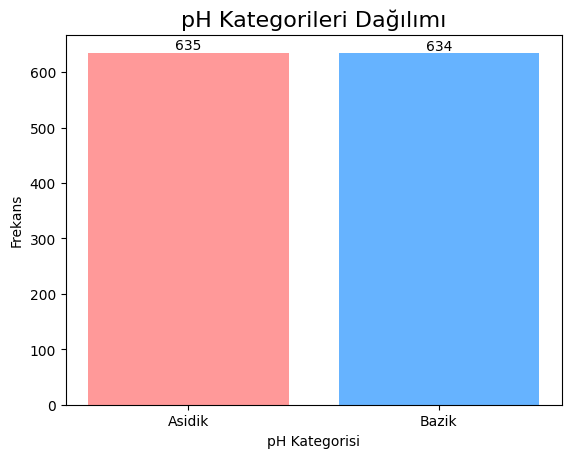

In [38]:
import matplotlib.pyplot as plt
category_counts = df0['ph_category'].value_counts()

# Sütun grafiği için verileri ayarlayın
categories = category_counts.index
counts = category_counts.values
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Asidik, Bazik, Nötr

# Grafiği oluşturun
fig, ax = plt.subplots()

# Sütun grafiğini çizin
bars = ax.bar(categories, counts, color=colors)

# Renklerin açıklamasını ekleyin
for bar, color in zip(bars, colors):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', color='black')

# Başlık ve etiketler ekleyin
plt.title('pH Kategorileri Dağılımı', fontsize=16)
plt.xlabel('pH Kategorisi')
plt.ylabel('Frekans')

# Göster
plt.show()

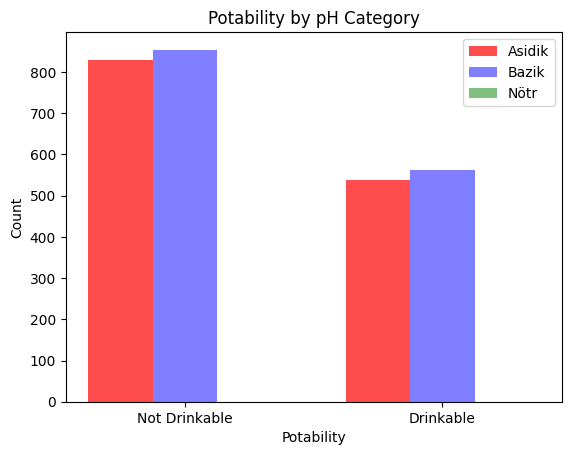

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df0 = pd.read_csv('waterpotability.csv')  

# pH değerine göre kategorileri belirleme
df0['ph_category'] = df0['ph'].apply(lambda x: 'Asidik' if x < 7 else ('Bazik' if x > 7 else 'Nötr'))

# NaN değerleri düşürme (opsiyonel)
df0.dropna(subset=['ph', 'Potability'], inplace=True)


acidic_potability_counts = df0[df0['ph_category'] == 'Asidik']['Potability'].value_counts().reindex([0, 1], fill_value=0)
basic_potability_counts = df0[df0['ph_category'] == 'Bazik']['Potability'].value_counts().reindex([0, 1], fill_value=0)
neutral_potability_counts = df0[df0['ph_category'] == 'Nötr']['Potability'].value_counts().reindex([0, 1], fill_value=0)

fig, ax = plt.subplots()

bar_width = 0.25
index = range(2)  # 0 ve 1 için

# Asidik su çubukları
ax.bar([i - bar_width for i in index], acidic_potability_counts, bar_width, color='red', alpha=0.7, label='Asidik')

# Bazik su çubukları
ax.bar(index, basic_potability_counts, bar_width, color='blue', alpha=0.5, label='Bazik')

# Nötr su çubukları
ax.bar([i + bar_width for i in index], neutral_potability_counts, bar_width, color='green', alpha=0.5, label='Nötr')

# Eksen etiketleri ve başlık
ax.set_xlabel('Potability')
ax.set_ylabel('Count')
ax.set_title('Potability by pH Category')
ax.set_xticks(index)
ax.set_xticklabels(['Not Drinkable', 'Drinkable'])
ax.legend()

# Grafiği göster
plt.show()


In [40]:
dframe['ph_category'] = dframe['ph'].apply(lambda x: 'Asidik' if x < 7 else ('Bazik' if x > 7 else 'Nötr'))

dframe = pd.get_dummies(dframe, columns=['ph_category'], drop_first=True)

dframe.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_category_Bazik
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,1
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,1
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,1
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,1


NİTELİKLERİN FREKANSLARININ GORSELLESTİRMESİ

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
for column in dframe.columns:
    counts = dframe[column].value_counts()
    print(counts)

8.316766    1
5.393346    1
8.129342    1
7.110845    1
6.017261    1
           ..
6.115638    1
7.566517    1
6.450645    1
5.621227    1
4.668102    1
Name: ph, Length: 2116, dtype: int64
214.373394    1
172.550261    1
211.123312    1
213.886337    1
206.014400    1
             ..
240.975156    1
205.396582    1
201.596673    1
221.649440    1
193.681735    1
Name: Hardness, Length: 2116, dtype: int64
22018.417441    1
28099.038729    1
22982.927445    1
25043.532803    1
15157.268787    1
               ..
15765.786718    1
30823.730490    1
27682.507446    1
11123.886159    1
47580.991603    1
Name: Solids, Length: 2116, dtype: int64
8.059332     1
5.789669     1
6.779005     1
6.048437     1
7.582124     1
            ..
10.088345    1
7.816636     1
5.655139     1
8.809433     1
7.166639     1
Name: Chloramines, Length: 2116, dtype: int64
356.886136    1
372.621943    1
326.397953    1
245.954253    1
307.704474    1
             ..
339.402440    1
354.175972    1
316.105892  

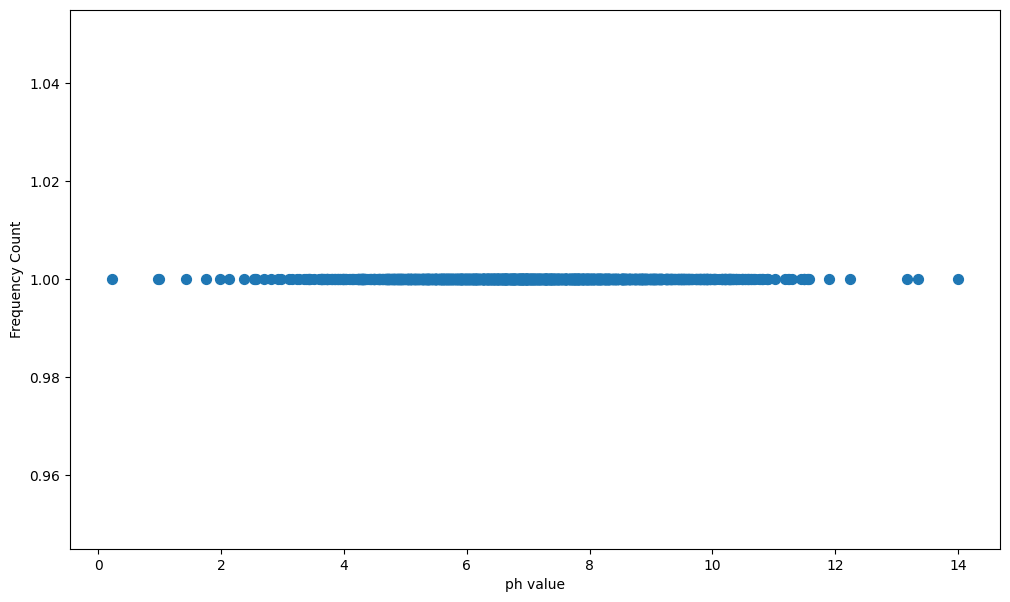

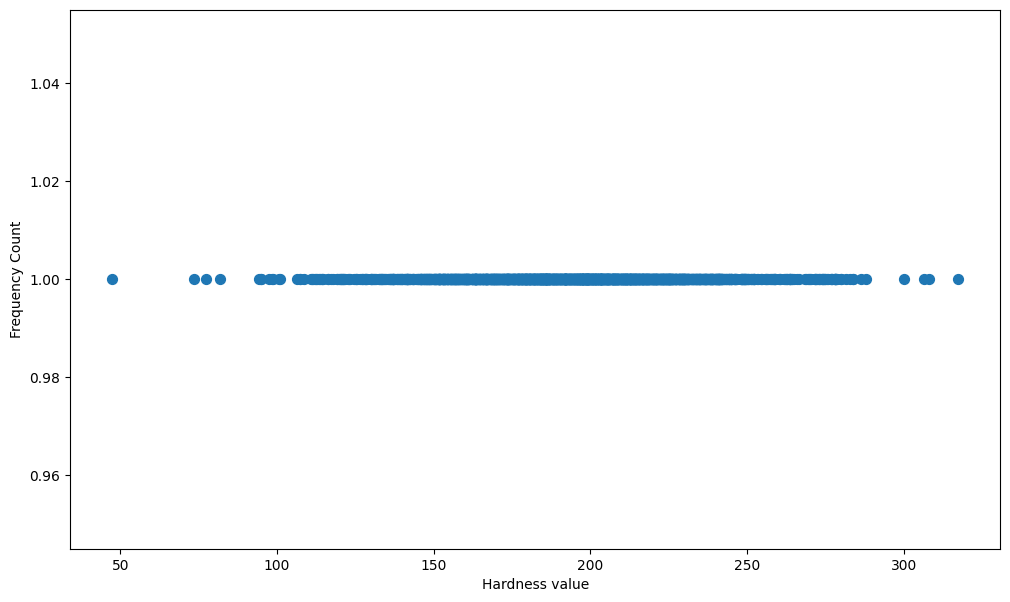

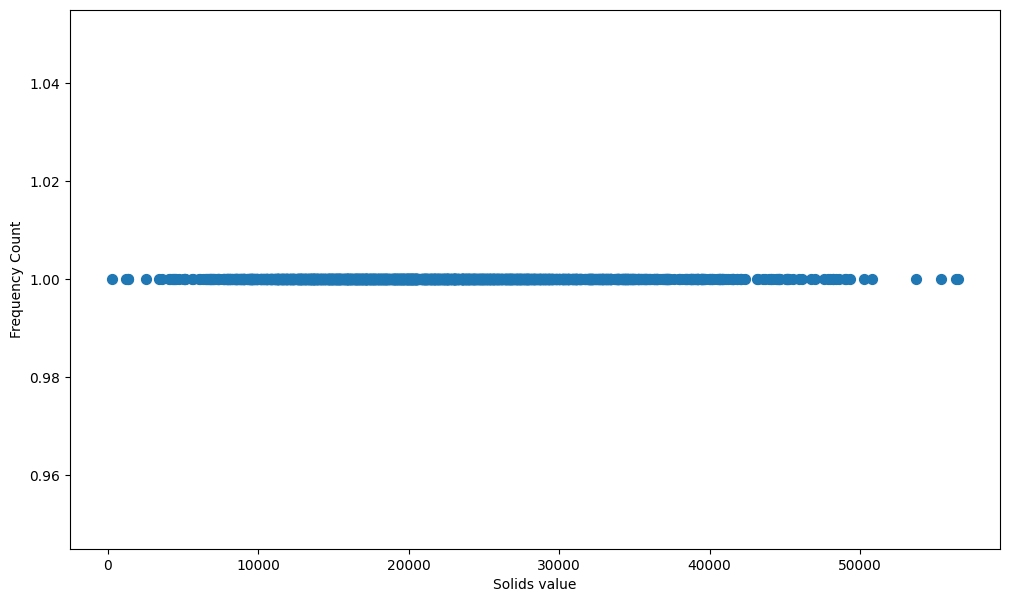

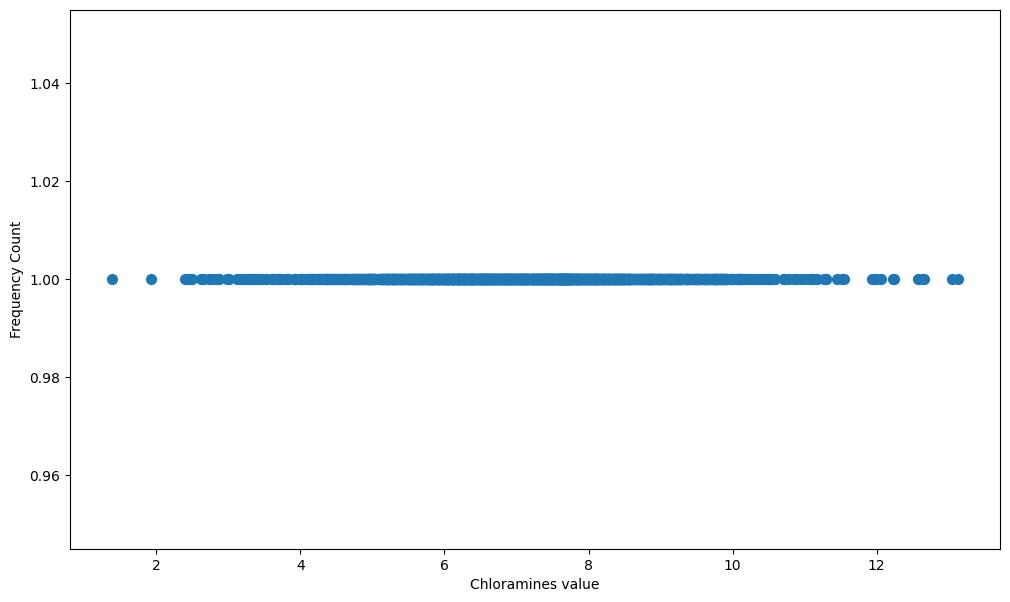

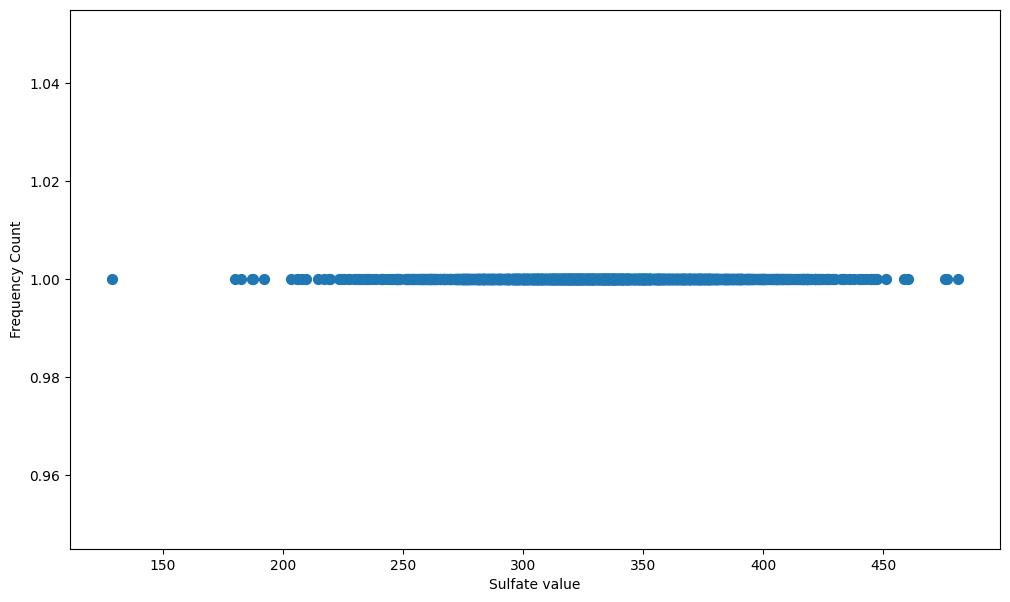

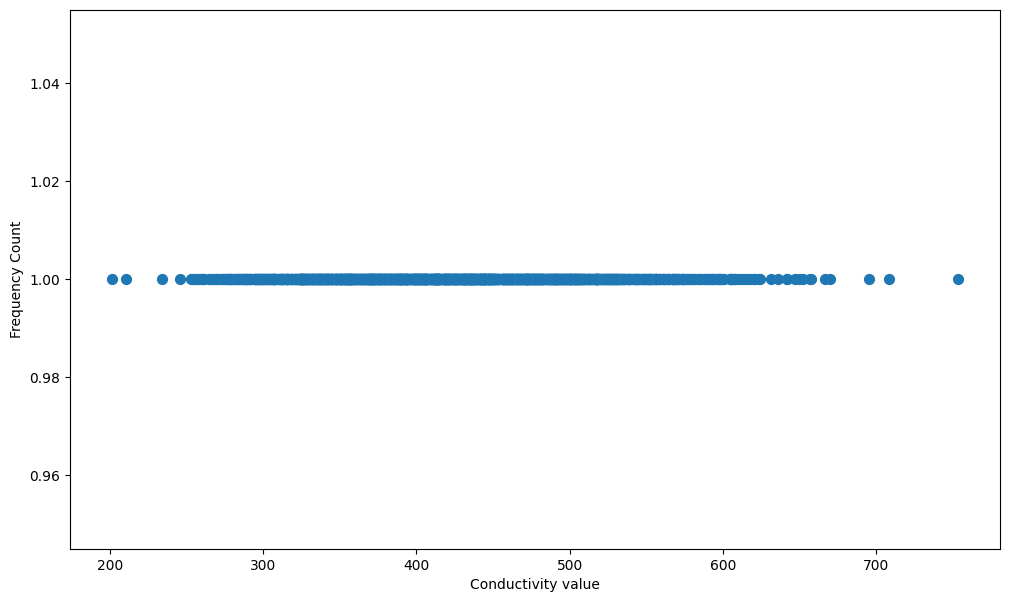

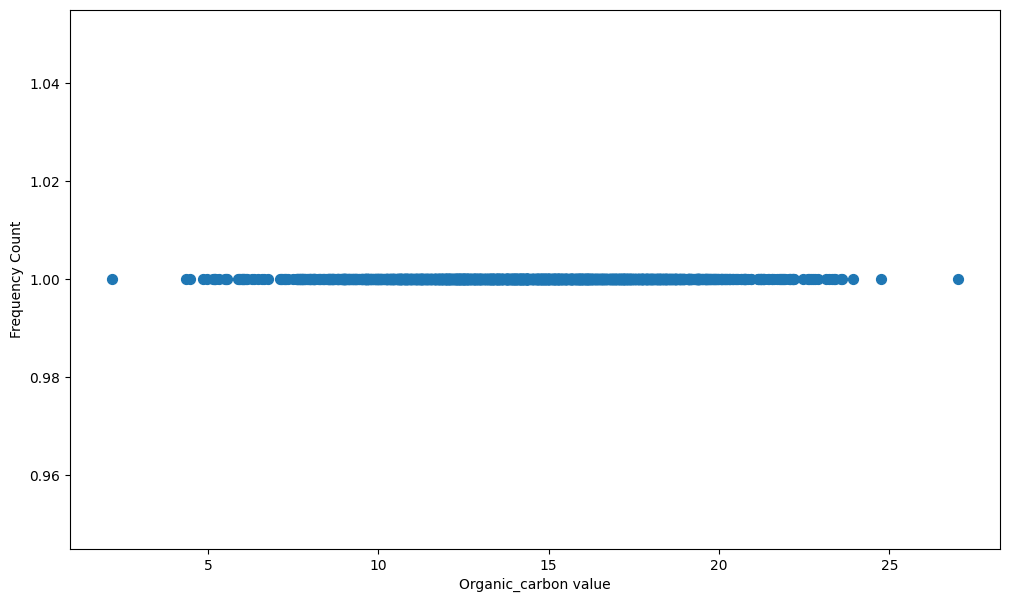

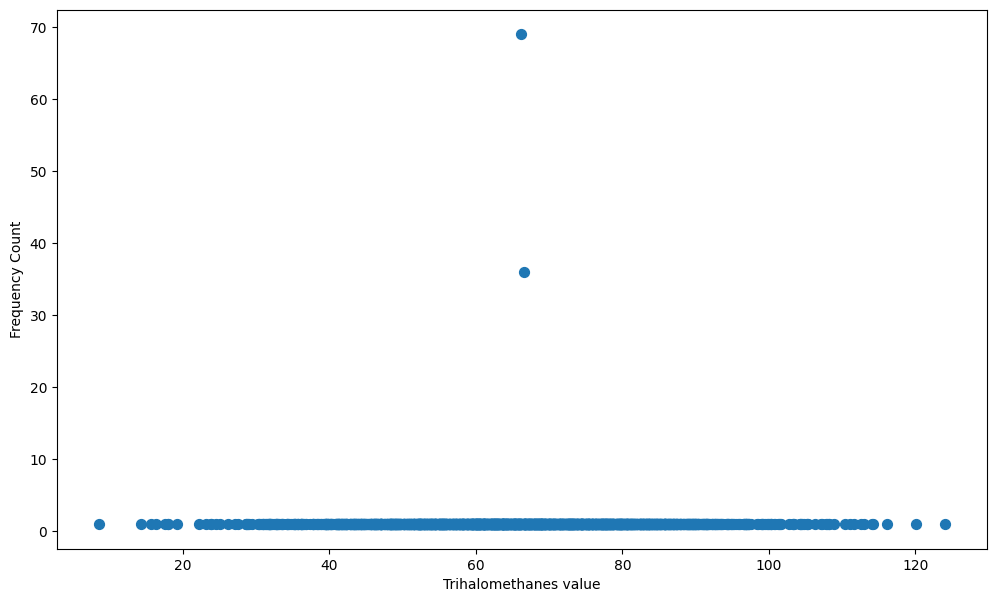

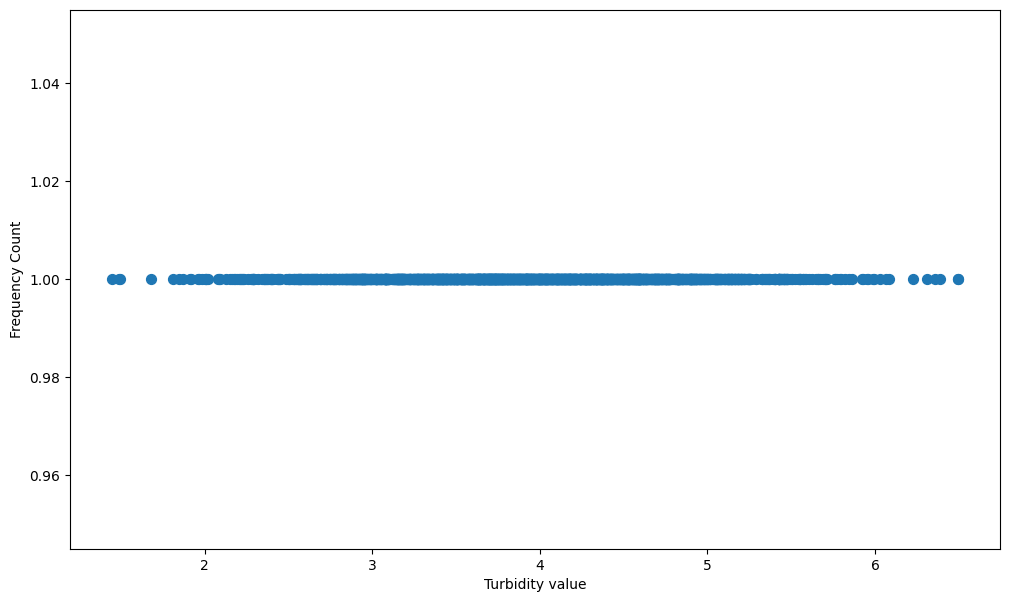

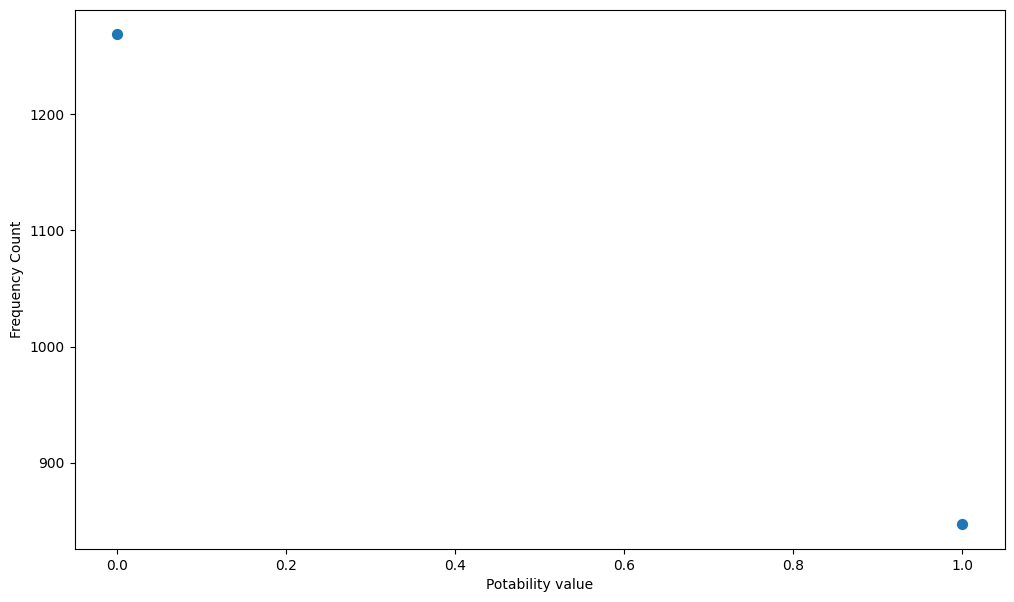

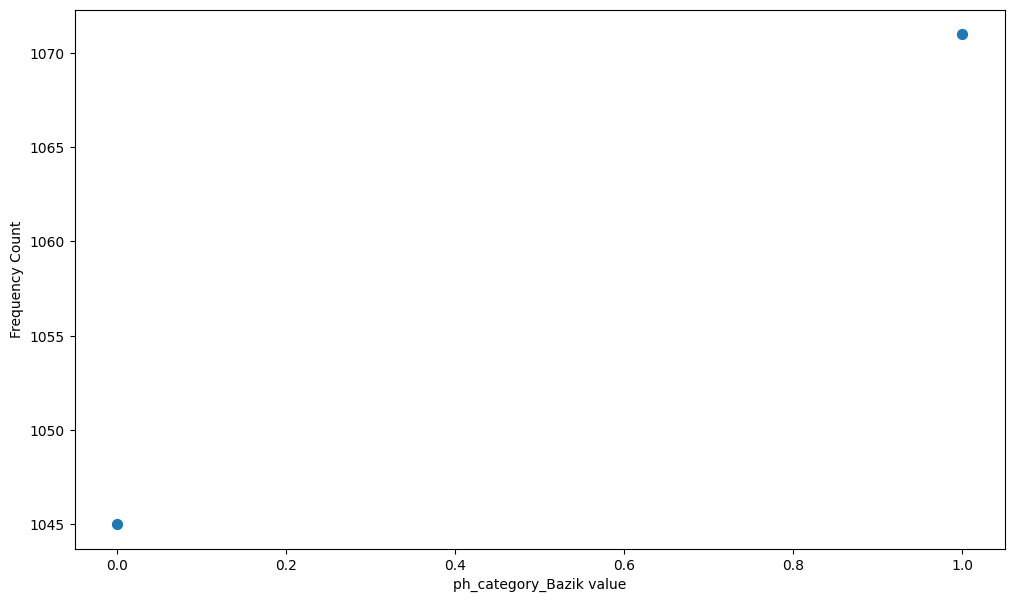

In [43]:
for column in dframe.columns:
    counts = dframe[column].value_counts().to_dict() #value_counts frekansları sayısal olarak gösteriyor.Bunları sözlüğe çeviriyoruz.
    temp_df = pd.DataFrame(counts , index=[0])#sözlük yapısındaki frekansları görselleştirme yapmak için dataframe' e çeviriyoruz.
    
    plt.figure(figsize=(12,7)) #sablonu olustrdum
    plt.scatter(temp_df.columns,temp_df.iloc[0],s=50 )  # scatter ile noktasal yaptım. 
    
    xlabel = column + ' value'
    plt.xlabel(xlabel)
    plt.ylabel('Frequency Count')

    plt.show()



In [44]:
for col in dframe.columns:
    Q3 = np.quantile(dframe[col], 0.95)
    Q1 = np.quantile(dframe[col], 0.05)
    IQR = Q3 - Q1
    
    print(col, 'niteliğinin IQR(Q3-Q1) değeri:\t ',Q3-Q1,'(',Q3,'-',Q1,')')

ph niteliğinin IQR(Q3-Q1) değeri:	  5.225282409519676 ( 9.796718581972561 - 4.571436172452885 )
Hardness niteliğinin IQR(Q3-Q1) değeri:	  107.15002265555918 ( 248.64142757672684 - 141.49140492116766 )
Solids niteliğinin IQR(Q3-Q1) değeri:	  28870.703365139583 ( 38426.89621319513 - 9556.192848055543 )
Chloramines niteliğinin IQR(Q3-Q1) değeri:	  5.225126397318449 ( 9.755831362755158 - 4.530704965436709 )
Sulfate niteliğinin IQR(Q3-Q1) değeri:	  133.7680219093304 ( 401.3859720240581 - 267.6179501147277 )
Conductivity niteliğinin IQR(Q3-Q1) değeri:	  265.18497329930966 ( 565.2837949342094 - 300.0988216348997 )
Organic_carbon niteliğinin IQR(Q3-Q1) değeri:	  10.700587512444248 ( 19.63801184363162 - 8.937424331187373 )
Trihalomethanes niteliğinin IQR(Q3-Q1) değeri:	  51.3726867281377 ( 91.40580376080467 - 40.03311703266697 )
Turbidity niteliğinin IQR(Q3-Q1) değeri:	  2.5440973961354567 ( 5.217425233966791 - 2.6733278378313345 )
Potability niteliğinin IQR(Q3-Q1) değeri:	  1.0 ( 1.0 - 0.0 )
p

In [45]:
for col in dframe.columns:
    Q3 = np.quantile(dframe[col], 0.95)
    Q1 = np.quantile(dframe[col], 0.05)
    IQR = Q3 - Q1
    
    min = Q1 - 1.5*IQR
    max = Q3 + 1.5*IQR
    print(f" {col} Outlier sayisi: {dframe[(dframe[col]>max)|(dframe[col]<min)].shape[0]}")#dframe tablosunun içinde maxtan büyük minden küçük olan aykırı değerleri yazdırıyorum.


 ph Outlier sayisi: 0
 Hardness Outlier sayisi: 0
 Solids Outlier sayisi: 0
 Chloramines Outlier sayisi: 0
 Sulfate Outlier sayisi: 0
 Conductivity Outlier sayisi: 0
 Organic_carbon Outlier sayisi: 0
 Trihalomethanes Outlier sayisi: 0
 Turbidity Outlier sayisi: 0
 Potability Outlier sayisi: 0
 ph_category_Bazik Outlier sayisi: 0


In [46]:
Q3 = np.quantile(dframe['ph'], 0.95)
Q1 = np.quantile(dframe['ph'], 0.05)
IQR = Q3 - Q1

min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

dframe[(dframe['ph']>max) | (dframe['ph']<min)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_category_Bazik


In [47]:
dframe.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_category_Bazik
count,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000
mean,7.083824,195.920219,22015.192720,7.125917,333.312912,425.979215,14.349405,66.397584,3.969878,0.400284,0.506144
std,1.586245,32.760861,8686.584143,1.589125,41.083397,80.724078,3.315629,15.673009,0.785557,0.490072,0.500080
min,0.227499,47.432000,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000,0.000000
25%,6.089079,176.832962,15666.690297,6.121864,307.706750,365.842780,12.118659,56.945270,3.436360,0.000000,0.000000
50%,7.027241,197.103467,21041.034771,7.138343,332.477743,423.156807,14.298910,66.206116,3.966109,0.000000,1.000000
75%,8.064291,216.122276,27353.621747,8.105680,359.267357,481.545011,16.665328,76.551208,4.521985,1.000000,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000,1.000000


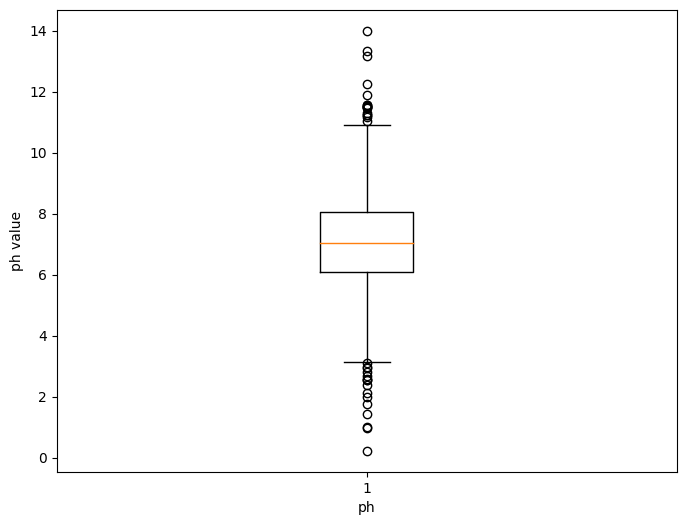

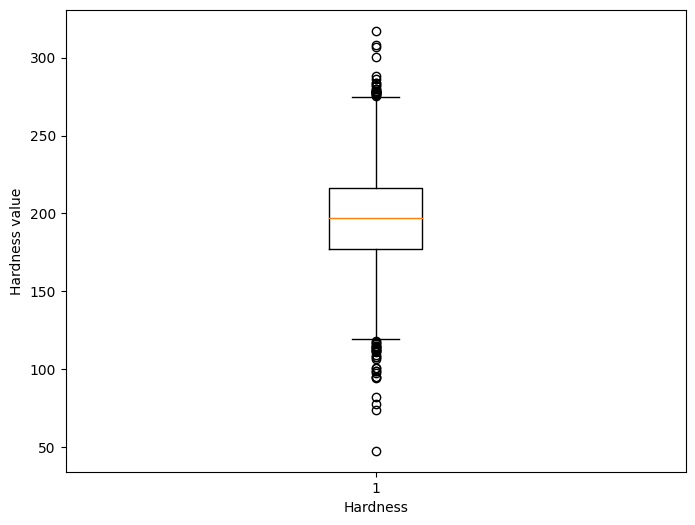

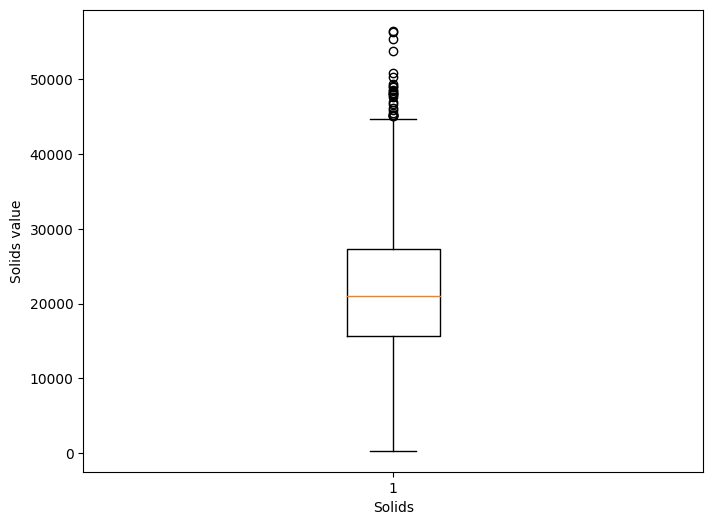

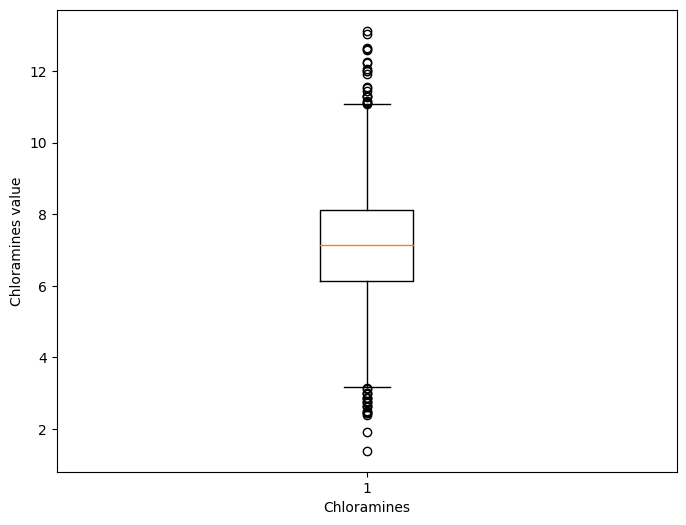

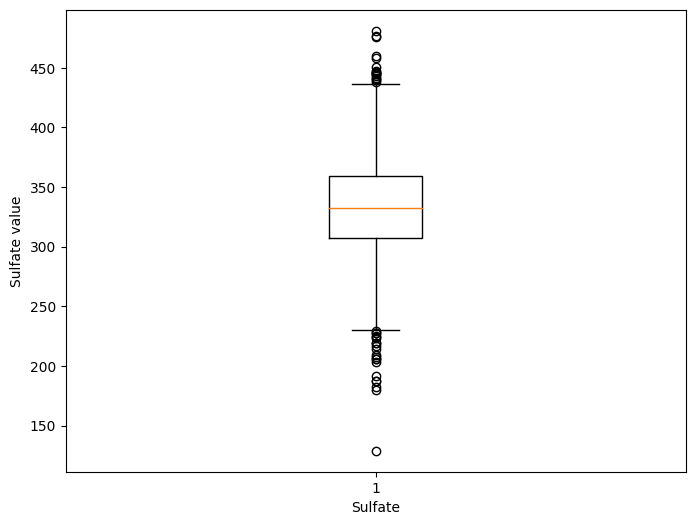

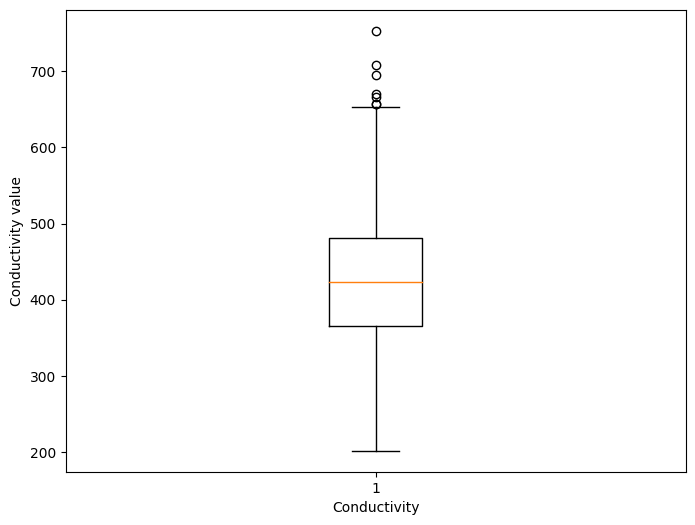

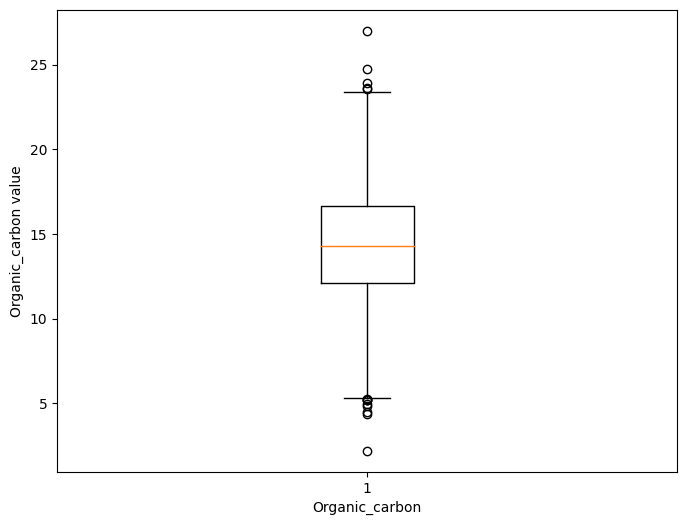

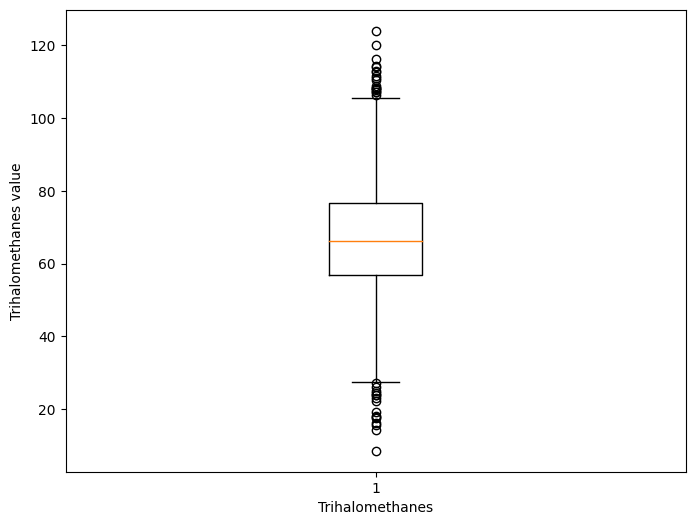

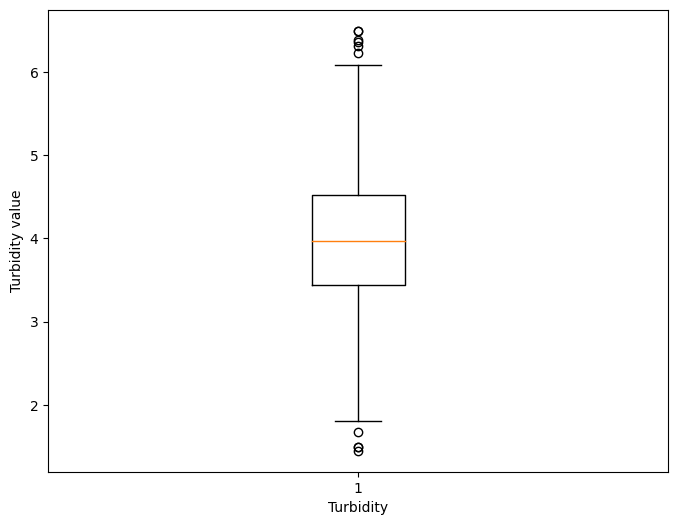

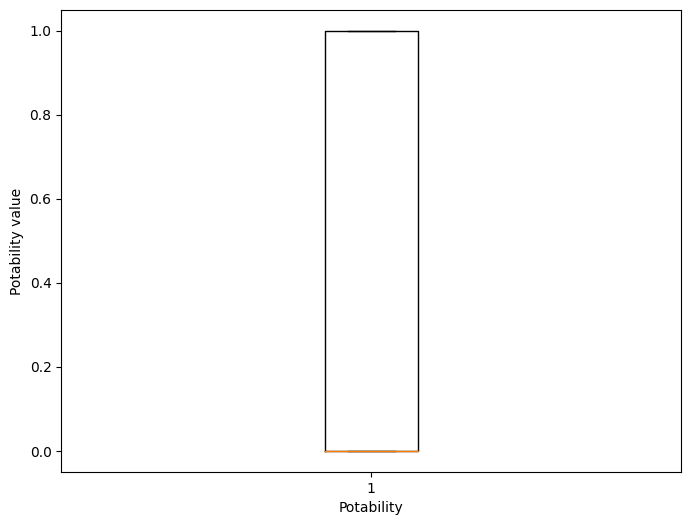

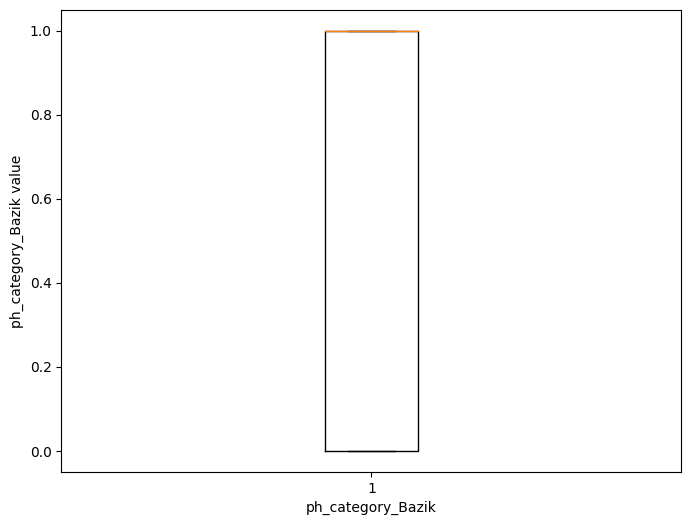

In [48]:
for col in dframe.columns:   
    plt.figure(figsize=(8,6))
    #sns.boxplot(x = dframe[col], y=dframe.Potability)
    plt.boxplot(x = dframe[col])
    
    ylabel = col + ' value'
    plt.xlabel(col)
    plt.ylabel(ylabel)
    
    plt.show()


In [49]:
print('Varyanslar:\n',dframe.var(axis=0))

Varyanslar:
 ph                   2.516174e+00
Hardness             1.073274e+03
Solids               7.545674e+07
Chloramines          2.525317e+00
Sulfate              1.687846e+03
Conductivity         6.516377e+03
Organic_carbon       1.099340e+01
Trihalomethanes      2.456432e+02
Turbidity            6.170999e-01
Potability           2.401701e-01
ph_category_Bazik    2.500804e-01
dtype: float64


In [50]:
print('Standart Sapmalar:\n',dframe.std(axis=0))

Standart Sapmalar:
 ph                      1.586245
Hardness               32.760861
Solids               8686.584143
Chloramines             1.589125
Sulfate                41.083397
Conductivity           80.724078
Organic_carbon          3.315629
Trihalomethanes        15.673009
Turbidity               0.785557
Potability              0.490072
ph_category_Bazik       0.500080
dtype: float64


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier


In [52]:
dframe.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_category_Bazik
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,1
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,1
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,1
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,1


In [53]:
X = dframe.drop('Potability', axis=1)
y = dframe['Potability']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [55]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

Logistic Regression Accuracy: 0.5778301886792453


In [56]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy:", accuracy_svc)

SVC Accuracy: 0.5778301886792453


In [57]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
train_pred_rf = rf.predict(X_train)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf_train = accuracy_score(y_train, train_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Train Accuracy:", accuracy_rf_train)

Random Forest Accuracy: 0.6957547169811321
Random Forest Train Accuracy: 1.0


In [58]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# XGBoost modelini eğitelim
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Tahminler yapalım
y_pred_xgb = xgb_model.predict(X_test)

# Modelin doğruluk skorunu alalım
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.6627358490566038
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.73       245
           1       0.63      0.48      0.55       179

    accuracy                           0.66       424
   macro avg       0.65      0.64      0.64       424
weighted avg       0.66      0.66      0.65       424

Confusion Matrix:
 [[195  50]
 [ 93  86]]


In [59]:
import lightgbm as lgb

# LightGBM modelini eğitelim
lgb_model = lgb.LGBMClassifier(verbose=0)
lgb_model.fit(X_train, y_train)

# Tahminler yapalım
y_pred_lgb = lgb_model.predict(X_test)

# Modelin doğruluk skorunu alalım
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Classification Report:\n", classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))


LightGBM Accuracy: 0.6910377358490566
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75       245
           1       0.67      0.53      0.59       179

    accuracy                           0.69       424
   macro avg       0.69      0.67      0.67       424
weighted avg       0.69      0.69      0.68       424

Confusion Matrix:
 [[199  46]
 [ 85  94]]


In [60]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)
train_pred_cat = cat_model.predict(X_train)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print("CatBoost Train Accuracy:", accuracy_score(y_train, train_pred_cat))
print("Classification Report:\n", classification_report(y_test, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))

CatBoost Accuracy: 0.7264150943396226
CatBoost Train Accuracy: 0.9219858156028369
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.91      0.79       245
           1       0.79      0.48      0.60       179

    accuracy                           0.73       424
   macro avg       0.75      0.69      0.70       424
weighted avg       0.74      0.73      0.71       424

Confusion Matrix:
 [[222  23]
 [ 93  86]]


In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train, y_train)

ab_y_pred = ab_model.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, ab_y_pred))
print("AdaBoost Classification Report:\n", classification_report(y_test, ab_y_pred))

AdaBoost Accuracy: 0.5801886792452831
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.82      0.69       245
           1       0.51      0.25      0.33       179

    accuracy                           0.58       424
   macro avg       0.55      0.54      0.51       424
weighted avg       0.56      0.58      0.54       424



In [62]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression için parametre grid'i
logreg_param_grid = {'C': [0.1, 1, 10]}

# SVC için parametre grid'i
svc_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Random Forest için parametre grid'i
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}

# XGBoost için parametre grid'i
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# LightGBM için parametre grid'i
lgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# CatBoost için parametre grid'i
cat_param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'depth': [3, 5, 7],
    'iterations': [100, 200, 300]
}

In [63]:
models = {
    'Logistic Regression': (LogisticRegression(), logreg_param_grid),
    'Random Forest': (RandomForestClassifier(), rf_param_grid),
    'XGBoost': (xgb_model, xgb_param_grid),
    'LightGBM': (lgb_model, lgb_param_grid),
    'CatBoost': (cat_model, cat_param_grid)
}

best_score = 0
best_model = None
best_params = None

for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    score = grid_search.best_score_
    params = grid_search.best_params_
    
    print(f"{name}: Best Score: {score}, Best Parameters: {params}")
    
    if score > best_score:
        best_score = score
        best_model = name
        best_params = params

print(f"\nBest Model: {best_model}, Best Score: {best_score}, Best Parameters: {best_params}")

Logistic Regression: Best Score: 0.6052015150721755, Best Parameters: {'C': 0.1}
Random Forest: Best Score: 0.6843989457331866, Best Parameters: {'max_depth': None, 'n_estimators': 300}
XGBoost: Best Score: 0.6743205739121328, Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [64]:
# Modeli kaydetme
model_path = 'cat_model.joblib'
joblib.dump(cat_model, model_path)
print(f"Model saved to {model_path}")


Model saved to cat_model.joblib


In [65]:
X_test.iloc[0], y_test.iloc[0]

(ph                       6.777506
 Hardness               207.050748
 Solids               15228.912909
 Chloramines              6.182409
 Sulfate                321.399404
 Conductivity           523.241732
 Organic_carbon          12.683724
 Trihalomethanes         86.165971
 Turbidity                4.263180
 ph_category_Bazik        0.000000
 Name: 1544, dtype: float64,
 1)